In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
target = pd.read_csv("./csv/Emiliani2.csv")
target = target.rename(columns={'Unnamed: 0': 'date'})

# removed data not available in features
target = target[(target['year'] != 2022) & (target['year'] != 2021)]
target = target[(target['year'] != 2020) | (target['week'] == 1)]

target['mean_diff'] = target['mean'] - target['mean'].shift(1)

meanOfMean = target['mean'].mean()
target['meanAnomaly'] = target['mean'].subtract(meanOfMean)

target.iat[45, 4] = 52 #small fix for 2001

target = target.reset_index(drop = True)
target

,date,mean,median,year,week,mean_diff,meanAnomaly
0,2001-01-05,0.214281,0.00,2001,1,NaN,-0.225919
1,2001-01-13,0.484737,0.52,2001,2,0.270456,0.044538
2,2001-01-21,0.466071,0.47,2001,3,-0.018666,0.025871
3,2001-01-29,0.417470,0.44,2001,5,-0.048601,-0.022730
4,2001-02-06,0.492202,0.53,2001,6,0.074732,0.052002
...,...,...,...,...,...,...,...
863,2019-12-01,0.478972,0.50,2019,48,-0.228394,0.038772
864,2019-12-09,0.369868,0.40,2019,50,-0.109104,-0.070332
865,2019-12-17,0.496676,0.53,2019,51,0.126808,0.056476
866,2019-12-25,0.484339,0.51,2019,52,-0.012337,0.044139


In [4]:
features = pd.read_csv("./csv/features/cultivable_pca.csv")
features = features.drop(features.iloc[:, 3:13],axis = 1)
features = features[features['Year'] != 2000]
features = features.reset_index(drop = True)
features = features.rename(columns={'Year': 'year'})
features = features.rename(columns={'Week': 'week'})
features

,Date,year,week,PC1_SnowDepth_4w,PC2_SnowDepth_4w,PC3_SnowDepth_4w,PC4_SnowDepth_4w,PC1_SnowDepth_8w,PC2_SnowDepth_8w,PC3_SnowDepth_8w,...,PC1_Temp_4w,PC2_Temp_4w,PC1_Temp_8w,PC2_Temp_8w,PC1_Temp_12w,PC2_Temp_12w,PC1_Temp_16w,PC2_Temp_16w,PC1_Temp_24w,PC2_Temp_24w
0,2001-01-07,2001,1,60.047217,-12.001438,-27.177045,15.770827,73.879221,-13.257567,-24.630780,...,-2.673073,-1.076798,0.578953,-1.243531,0.013704,-1.544621,0.267257,1.303921,-0.853268,1.020161
1,2001-01-14,2001,2,68.521848,-16.412903,-26.562676,14.781674,75.230909,-15.562189,-23.070565,...,-0.965346,-1.081186,1.754432,-1.235706,0.283662,-1.492639,0.155712,1.520726,-0.241528,1.202245
2,2001-01-21,2001,3,71.991883,-27.568485,-24.407834,5.550499,71.699483,-24.042084,-20.631764,...,0.795140,-1.476907,2.309630,-1.061629,0.551910,-1.605673,0.355953,1.567187,0.212762,1.241368
3,2001-01-28,2001,4,85.142828,-26.808169,-26.221888,7.581538,69.143903,-24.621887,-22.285755,...,1.436227,-1.940374,1.516453,-0.944631,0.034613,-1.727611,-0.232737,1.631773,0.374903,1.279324
4,2001-02-04,2001,5,91.077917,-26.736991,-30.766277,8.273658,75.770898,-20.176034,-29.030144,...,-0.319022,-1.673287,1.659083,-1.454960,0.631888,-1.524116,0.286867,1.709188,0.556561,1.395261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,2019-12-08,2019,49,158.184793,-5.684501,-38.383046,-12.192130,77.348579,0.545899,-21.775580,...,-1.292331,-3.072884,4.051558,-2.005634,4.120762,-1.506289,3.663319,1.496477,4.071044,1.001040
988,2019-12-15,2019,50,190.408660,-16.391168,-43.208814,-27.856587,97.377809,-6.029612,-25.024124,...,-1.804809,-2.109057,3.967518,-1.908658,3.836250,-1.516735,3.719451,1.431488,4.084428,0.976990
989,2019-12-22,2019,51,201.773553,-14.544946,-43.962000,-31.657145,119.687025,-6.918286,-28.460843,...,-3.423896,-1.131502,3.091391,-1.713155,3.496166,-1.610237,3.643456,1.360782,3.552505,1.076520
990,2019-12-29,2019,52,189.216886,-12.778934,-40.366582,-34.497138,143.548431,-8.574804,-32.426366,...,-6.286089,-1.129820,3.406874,-1.826787,4.284420,-1.706025,4.010376,1.444142,3.839565,1.157303


In [5]:
features_filtered = pd.merge(features, target, on=['year', 'week'], how='inner')[features.columns]
features_filtered = features_filtered.drop(features.iloc[:, :3],axis = 1)
features_filtered

,PC1_SnowDepth_4w,PC2_SnowDepth_4w,PC3_SnowDepth_4w,PC4_SnowDepth_4w,PC1_SnowDepth_8w,PC2_SnowDepth_8w,PC3_SnowDepth_8w,PC4_SnowDepth_8w,PC1_SnowDepth_12w,PC2_SnowDepth_12w,...,PC1_Temp_4w,PC2_Temp_4w,PC1_Temp_8w,PC2_Temp_8w,PC1_Temp_12w,PC2_Temp_12w,PC1_Temp_16w,PC2_Temp_16w,PC1_Temp_24w,PC2_Temp_24w
0,60.047217,-12.001438,-27.177045,15.770827,73.879221,-13.257567,-24.630780,0.282947,51.833574,-13.799040,...,-2.673073,-1.076798,0.578953,-1.243531,0.013704,-1.544621,0.267257,1.303921,-0.853268,1.020161
1,68.521848,-16.412903,-26.562676,14.781674,75.230909,-15.562189,-23.070565,-0.762645,59.688614,-14.492602,...,-0.965346,-1.081186,1.754432,-1.235706,0.283662,-1.492639,0.155712,1.520726,-0.241528,1.202245
2,71.991883,-27.568485,-24.407834,5.550499,71.699483,-24.042084,-20.631764,-5.699207,64.397766,-16.404475,...,0.795140,-1.476907,2.309630,-1.061629,0.551910,-1.605673,0.355953,1.567187,0.212762,1.241368
3,91.077917,-26.736991,-30.766277,8.273658,75.770898,-20.176034,-29.030144,6.751740,79.002229,-18.729046,...,-0.319022,-1.673287,1.659083,-1.454960,0.631888,-1.524116,0.286867,1.709188,0.556561,1.395261
4,94.889836,-26.573940,-36.465664,8.975367,82.195479,-22.824304,-32.145548,7.161005,81.574322,-20.546557,...,-0.032257,-1.913513,0.605810,-1.554172,1.415051,-1.526384,0.411388,1.661507,0.370217,1.477906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,98.564495,0.321493,-31.881564,-2.745460,49.197700,3.530352,-20.098953,-1.027293,37.165148,3.589968,...,-0.480067,-2.507603,3.259583,-2.003618,3.246007,-1.514151,3.598093,1.397859,3.730710,1.009234
864,190.408660,-16.391168,-43.208814,-27.856587,97.377809,-6.029612,-25.024124,-15.434581,65.457731,-2.797630,...,-1.804809,-2.109057,3.967518,-1.908658,3.836250,-1.516735,3.719451,1.431488,4.084428,0.976990
865,201.773553,-14.544946,-43.962000,-31.657145,119.687025,-6.918286,-28.460843,-20.070026,79.894211,-3.609713,...,-3.423896,-1.131502,3.091391,-1.713155,3.496166,-1.610237,3.643456,1.360782,3.552505,1.076520
866,189.216886,-12.778934,-40.366582,-34.497138,143.548431,-8.574804,-32.426366,-25.312409,95.400104,-4.399713,...,-6.286089,-1.129820,3.406874,-1.826787,4.284420,-1.706025,4.010376,1.444142,3.839565,1.157303


In [6]:
X = features_filtered
print(X.shape)

(868, 60)


In [7]:
y = target['meanAnomaly']
print(y.shape)

(868,)


In [8]:
y_train, y_test = train_test_split(y, test_size=0.2, random_state=36, shuffle=False)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=36, shuffle=False)

In [13]:
#create linear model
regression = LinearRegression()

#fit linear model
regression.fit(X_train, y_train)

y_prediction = regression.predict(X_test)

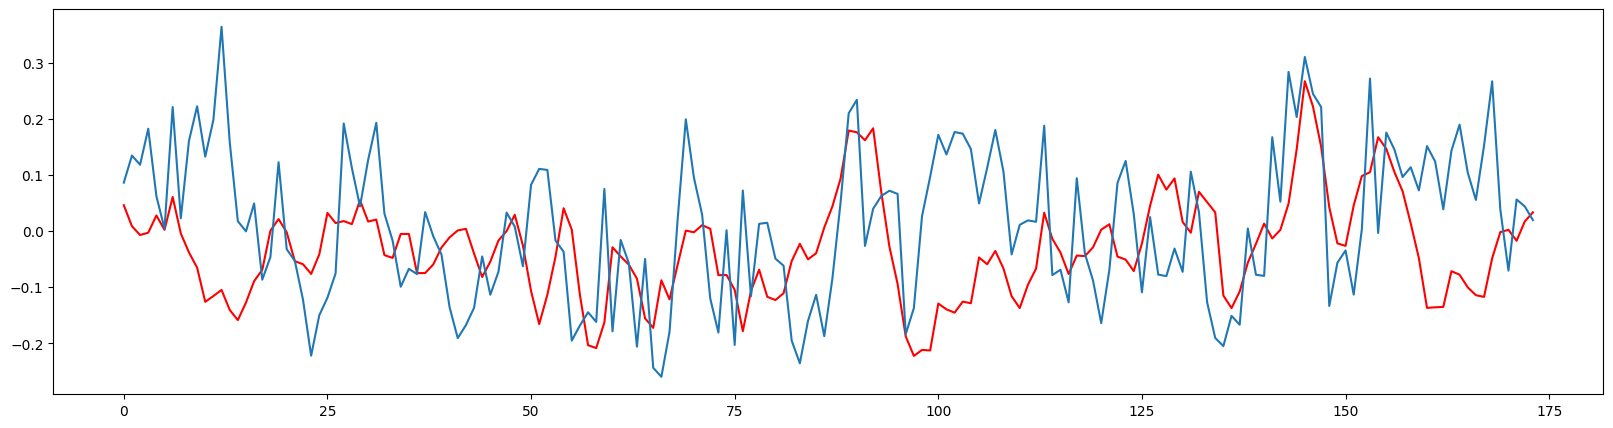

In [15]:
import matplotlib.pyplot as plt

plt.plot(y_prediction, color='red')
y_test.reset_index(drop = True, inplace = True)
plt.plot(y_test)

plt.rcParams["figure.figsize"] = (20,5)

plt.show()

In [16]:
score = r2_score(y_test,y_prediction) # the model fits the data really poorly, negative r2 score
print('r2 score is ',score)
print('mean_squared_error is ',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is ',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  -0.2595470493254426
mean_squared_error is  0.02166770771090478
root_mean_squared error of is  0.14719955064776788


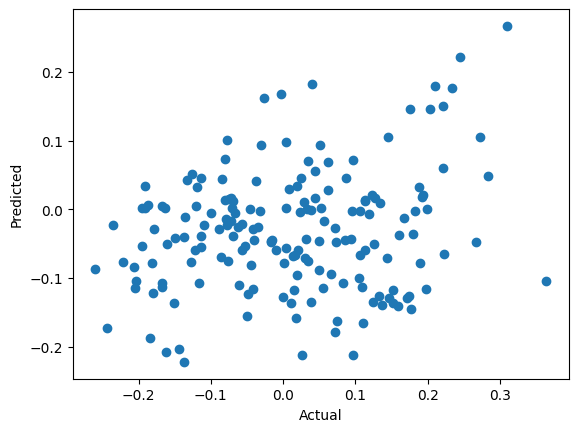

In [12]:
plt.scatter(y_test,y_prediction);
plt.xlabel('Actual');
plt.ylabel('Predicted');

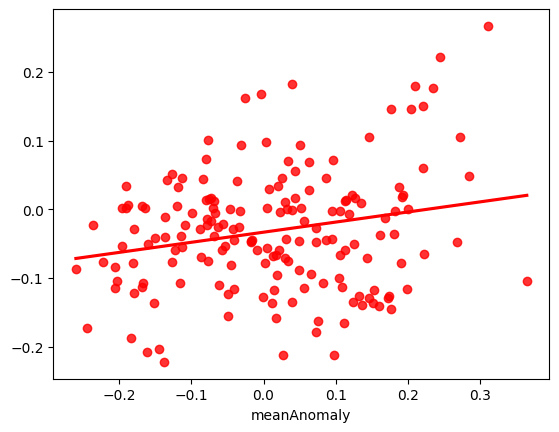

In [13]:
sns.regplot(x=y_test,y=y_prediction,ci=None,color ='red');

## Regression with mean differences

In [14]:
y_diff = target['mean_diff'].dropna()
X_diff = features_filtered.iloc[1: , :]

In [15]:
y_train_diff, y_test_diff = train_test_split(y_diff, test_size=0.2, random_state=36, shuffle=False)
X_train_diff, X_test_diff = train_test_split(X_diff, test_size=0.2, random_state=36, shuffle=False)

In [16]:
#create linear model
regression = LinearRegression()

#fit linear model
regression.fit(X_train_diff, y_train_diff)

y_prediction_diff = regression.predict(X_test_diff)

In [17]:
score = r2_score(y_test_diff,y_prediction_diff) # smaller than bf
print('r2 score is ',score)
print('mean_squared_error is ',mean_squared_error(y_test_diff,y_prediction_diff))
print('root_mean_squared error of is ',np.sqrt(mean_squared_error(y_test_diff,y_prediction_diff)))

r2 score is  -0.063410148847586
mean_squared_error is  0.015124338035567895
root_mean_squared error of is  0.1229810474649159


In [18]:
score = r2_score(y_test,y_prediction) # the model fits the data really poorly, negative r2 score
print('r2 score is ',score)
print('mean_squared_error is ',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is ',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  -0.2595470493254426
mean_squared_error is  0.02166770771090478
root_mean_squared error of is  0.14719955064776788
